This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

K-Nearest Neighbors (KNN): KNN classifies an example by looking at the k closest examples around it. This algorithm assumes that patients with similar characteristics tend to have similar types of cancer. KNN can be used for cancer diagnosis by taking into account neighborhood relationships in the data set.

Link to the dataset: https://www.kaggle.com/datasets/erdemtaha/cancer-data

# 1. Load and modify data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [109]:
# load the data
df = pd.read_csv("Cancer_Data.csv")

In [110]:
# we can see that we have a lot of columns (32 columns)
# let's see if we can delete some of columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [111]:
# read data
# we can drop "id", "Unnamed: 32" columns
# due to their unnecessariness
# and we need to Encode the "diagnosis" column
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [112]:
# check for duplicates
df.duplicated().sum()

0

In [113]:
# check for missing values
# I have nan values in the "Unnamed: 32"
# but anyway I was planing to drop this column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [114]:
df = df.drop(["id", "Unnamed: 32"], axis=1)

In [115]:
# convert Gender into numeric format
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['diagnosis']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [116]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
# check the number of values
# the data is not quite balanced
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [118]:
# for undersampling and oversampling
df.to_csv('clean_data.csv', index=False)

# 2. Scale data

In [119]:
# MinMaxScaler is the basic scaler. basically: 0 means lowest value in the column
# 1 means highest value in the column. all values will be decimals between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
# scale all columns except the target
scaled_data = scaler.fit_transform(df.drop(columns=["diagnosis"])) 

# 3.  Convert data to X/y

In [120]:
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = scaled_data
y = df["diagnosis"]

In [121]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=156)

# 4. Create the KNN classifier and fit the data

Based on iterations, best k-value is this:
5


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

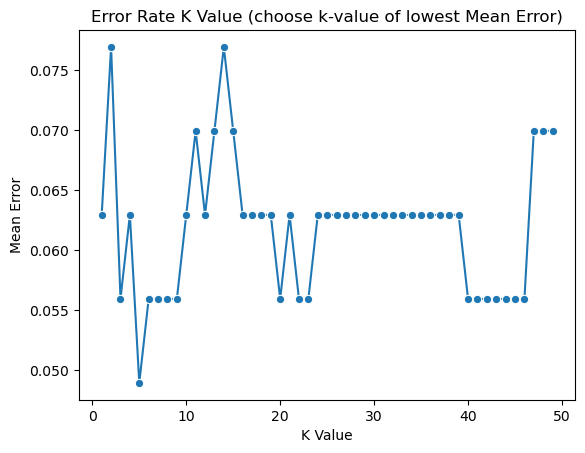

In [122]:
# determine the optimal k-value for this algorithm

# classifier version
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski"))
model.fit(X_train, y_train)

# 5.  Classification error metrics

In [123]:
predictions = model.predict(X_test)

In [124]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# I am quite suprise with results
# 95% is great

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        93
           1       0.96      0.90      0.93        50

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143


Model overall accuracy: 95.10%


<Axes: >

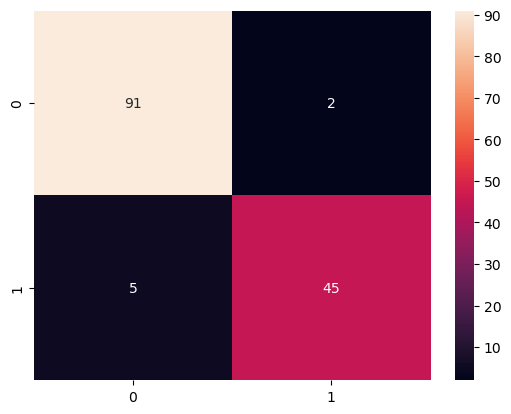

In [125]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# the little amount mistakes
# compared to right answers

In [126]:
# The AUC score
roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])

0.9725806451612904

# 6. Visualisation

In [127]:
# check labels for plots
unique_labels = df["diagnosis"].unique()
print("Unique labels:", unique_labels)

Unique labels: [1 0]


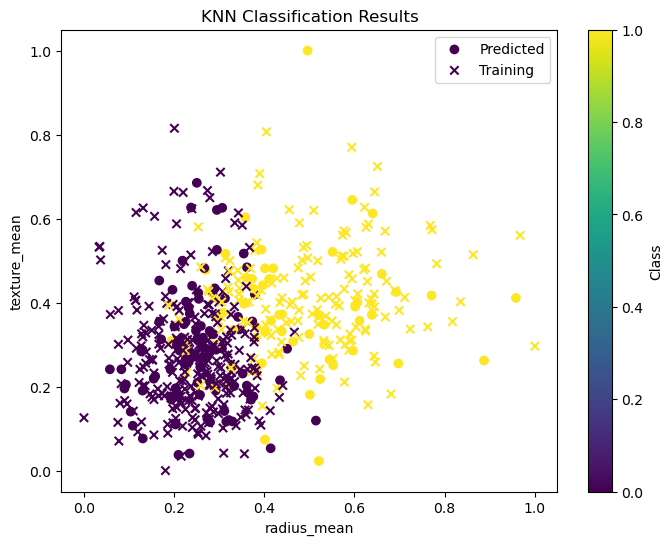

In [128]:
# make a scatter plot
plt.figure(figsize=(8, 6))

# plot the test data points with color mapped 
# to their true labels, using circles as markers, 
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Predicted')

# use crosses for the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='x', label='Training')

# set x-axis and y-axis labels
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('KNN Classification Results')
# add a color bar to indicate class labels
plt.colorbar(label='Class')
plt.legend()
plt.show()


# CIRCLES
# The points in the testing set are represented by circles, 
# colored according to their predicted class labels

# CROSSES
# The points in the training set are represented by crosses, 
# colored according to their actual class labels

# we can see that there is a little bit of overlapping
# but in general we can see two groups

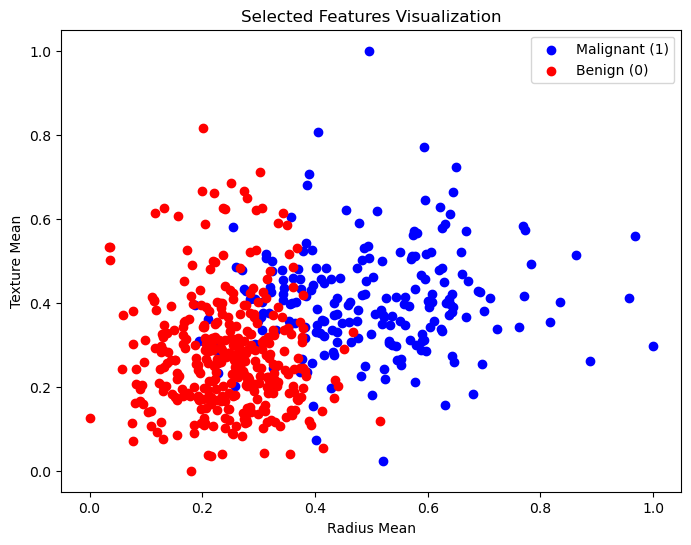

In [129]:
# separate the data points into two groups based on their class labels
# extract data points with class label 1 and 2
# 1 - malignant
# 0 - benign
X_group1 = X[y == 1]
X_group2 = X[y == 0]

# define the selected features for visualization
# just random choice of these two
selected_features = ["smoothness_mean", "compactness_mean"]

# create a new figure for the plot with specified size
plt.figure(figsize=(8, 6))

# plot data points from group 1 (malignant) with blue color and label
plt.scatter(X_group1[:, 0], X_group1[:, 1], color='blue', label='Malignant (1)')

# plot data points from group 2 (benign) with red color and label
plt.scatter(X_group2[:, 0], X_group2[:, 1], color='red', label='Benign (0)')

# set x-axis and y-axis labels
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
# make a title
plt.title('Selected Features Visualization')
plt.legend()
# show the plot
plt.show()